# Examining predictions

The purpose of this notebook is to look at the predictions different models are making, and see where they are performing well and poorly. Hopefully this can start to illuminate what it is they're learning.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

## Helper functions

In [2]:
base_dir = Path('../Code/')

def load_preds(n_units):
    correct_fname = Path(f'basic_addition_2term_2dig_{n_units}units_correct.csv')
    incorrect_fname = Path(f'basic_addition_2term_2dig_{n_units}units_incorrect.csv')\
    
    correct_df = pd.read_csv(base_dir / correct_fname)
    incorrect_df = pd.read_csv(base_dir / incorrect_fname)
    
    correct_df['X_true_1'], correct_df['X_true_2'] = correct_df['X_true'].str.split('+', 1).str
    incorrect_df['X_true_1'], incorrect_df['X_true_2'] = incorrect_df['X_true'].str.split('+', 1).str
    
    correct_df['X_true_1'] = pd.to_numeric(correct_df['X_true_1'])
    correct_df['X_true_2'] = pd.to_numeric(correct_df['X_true_2'])
    
    incorrect_df['X_true_1'] = pd.to_numeric(incorrect_df['X_true_1'])
    incorrect_df['X_true_2'] = pd.to_numeric(incorrect_df['X_true_2'])
    
    correct_df.columns = [x.strip() for x in correct_df.columns]
    incorrect_df.columns = [x.strip() for x in incorrect_df.columns]
    
    return correct_df, incorrect_df

def symmetric_df(df):
    x1 = df[['X_true_1', 'X_true_2']]
    x2 = x1.copy()
    x2.columns = ['X_true_2', 'X_true_1']
    symmetric_df = pd.merge(x1, x2, on=['X_true_1', 'X_true_2'], how='inner')
    return symmetric_df

def summarize(correct_df, incorrect_df, symmetric_correct_df=None, symmetric_incorrect_df=None):
    num_rows = correct_df.shape[0] + incorrect_df.shape[0]
    print(f'Correct: {100*correct_df.shape[0] / num_rows:.2f}%')
    print(f'Incorrect: {100*incorrect_df.shape[0] / num_rows:.2f}%')
    print('-'*20)
    if symmetric_correct_df is not None:
        print(f'Percent symmetric in correct: {100*symmetric_correct_df.shape[0] / correct_df.shape[0]:.2f}%')
    if symmetric_incorrect_df is not None:
        print(f'Percent symmetric in incorrect: {100*symmetric_incorrect_df.shape[0] / incorrect_df.shape[0]:.2f}%')
    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 12))
    ax1.hist(correct_df['X_true_1'], density=True, alpha=0.35, label='Correct', bins=100)
    ax1.hist(incorrect_df['X_true_1'], density=True, alpha=0.35, color='red', label='Incorrect', bins=100)
    ax2.hist(correct_df['X_true_2'], density=True, alpha=0.35, label='Correct', bins=100)
    ax2.hist(incorrect_df['X_true_2'], density=True, alpha=0.35, color='red', label='Incorrect', bins=100)
    start, end = ax1.get_xlim()
    ax1.xaxis.set_ticks(np.arange(start, end, 5))
    ax2.xaxis.set_ticks(np.arange(start, end, 5))
    ax1.set_title('First num')
    ax2.set_title('Second num')
    ax1.legend()
    ax2.legend();

## 2 terms, 2 digits

These are the results of `correct_incorrect_preds.py` with the model described above (non-reversed).

### 1 hidden unit

### 2 hidden units

### 4 hidden units

In [382]:
correct4_df, incorrect4_df = load_preds(4)

<ipython-input-301-cc6280e1e1ed>:10: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  correct_df['X_true_1'], correct_df['X_true_2'] = correct_df['X_true'].str.split('+', 1).str
<ipython-input-301-cc6280e1e1ed>:11: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  incorrect_df['X_true_1'], incorrect_df['X_true_2'] = incorrect_df['X_true'].str.split('+', 1).str


In [383]:
symmetric_correct4_df = symmetric_df(correct4_df)
symmetric_incorrect4_df = symmetric_df(incorrect4_df)

Correct: 15.99%
Incorrect: 84.01%
--------------------
Percent symmetric in correct: 56.72%
Percent symmetric in incorrect: 91.76%


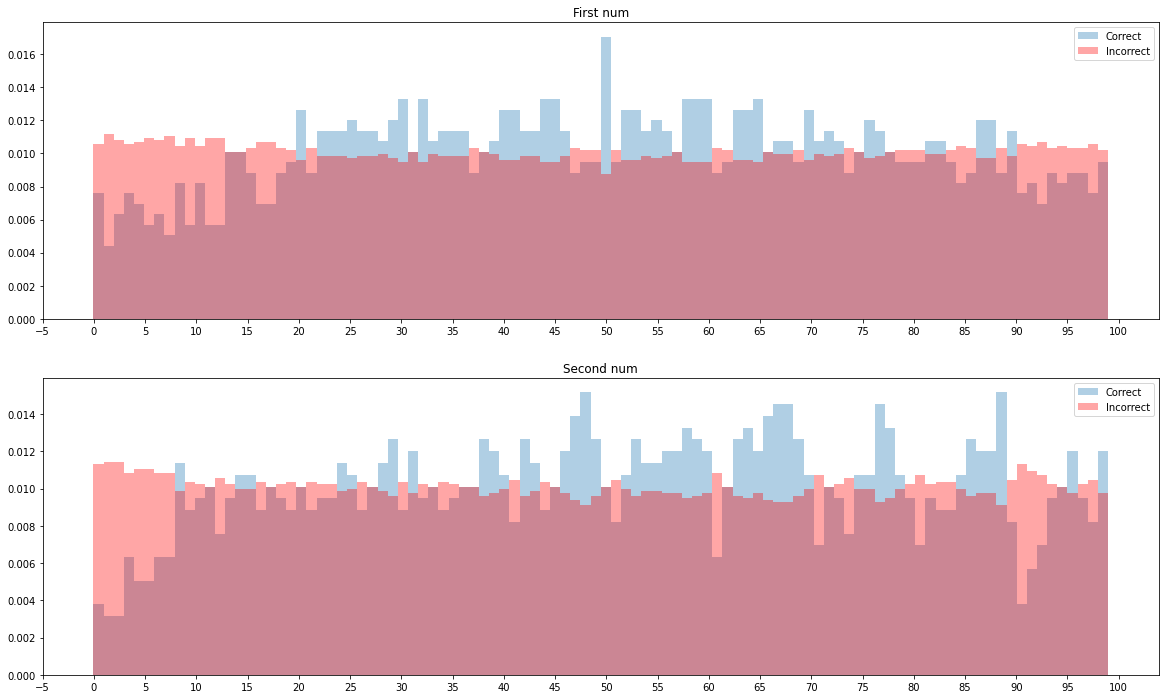

In [384]:
summarize(correct4_df, incorrect4_df, symmetric_correct4_df, symmetric_incorrect4_df)

### 8 hidden units

In [389]:
correct8_df, incorrect8_df = load_preds(8)

<ipython-input-301-cc6280e1e1ed>:10: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  correct_df['X_true_1'], correct_df['X_true_2'] = correct_df['X_true'].str.split('+', 1).str
<ipython-input-301-cc6280e1e1ed>:11: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  incorrect_df['X_true_1'], incorrect_df['X_true_2'] = incorrect_df['X_true'].str.split('+', 1).str


In [303]:
symmetric_correct8_df = symmetric_df(correct8_df)
symmetric_incorrect8_df = symmetric_df(incorrect8_df)

Correct: 27.74%
Incorrect: 72.26%
--------------------
Percent symmetric in correct: 63.77%
Percent symmetric in incorrect: 86.09%


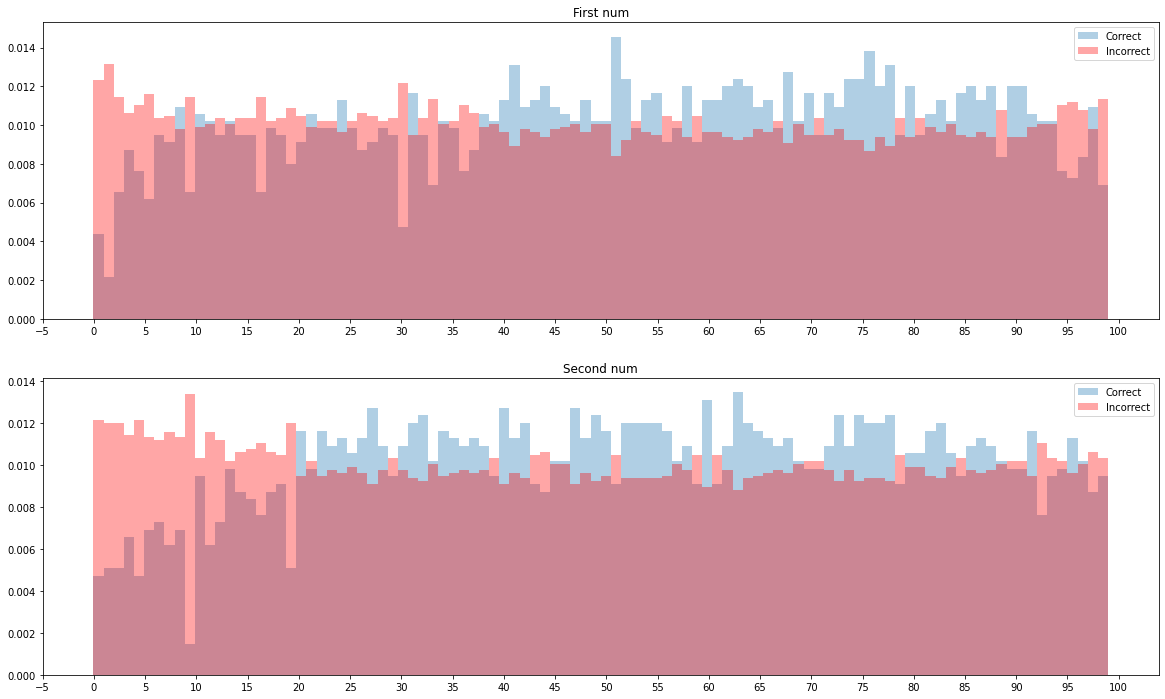

In [304]:
summarize(correct8_df, incorrect8_df, symmetric_correct8_df, symmetric_incorrect8_df)

### 16 hidden units

In [398]:
correct16_df, incorrect16_df = load_preds(16)

<ipython-input-301-cc6280e1e1ed>:10: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  correct_df['X_true_1'], correct_df['X_true_2'] = correct_df['X_true'].str.split('+', 1).str
<ipython-input-301-cc6280e1e1ed>:11: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  incorrect_df['X_true_1'], incorrect_df['X_true_2'] = incorrect_df['X_true'].str.split('+', 1).str


In [399]:
symmetric_correct16_df = symmetric_df(correct16_df)
symmetric_incorrect16_df = symmetric_df(incorrect16_df)

Correct: 45.42%
Incorrect: 54.58%
--------------------
Percent symmetric in correct: 71.75%
Percent symmetric in incorrect: 76.49%


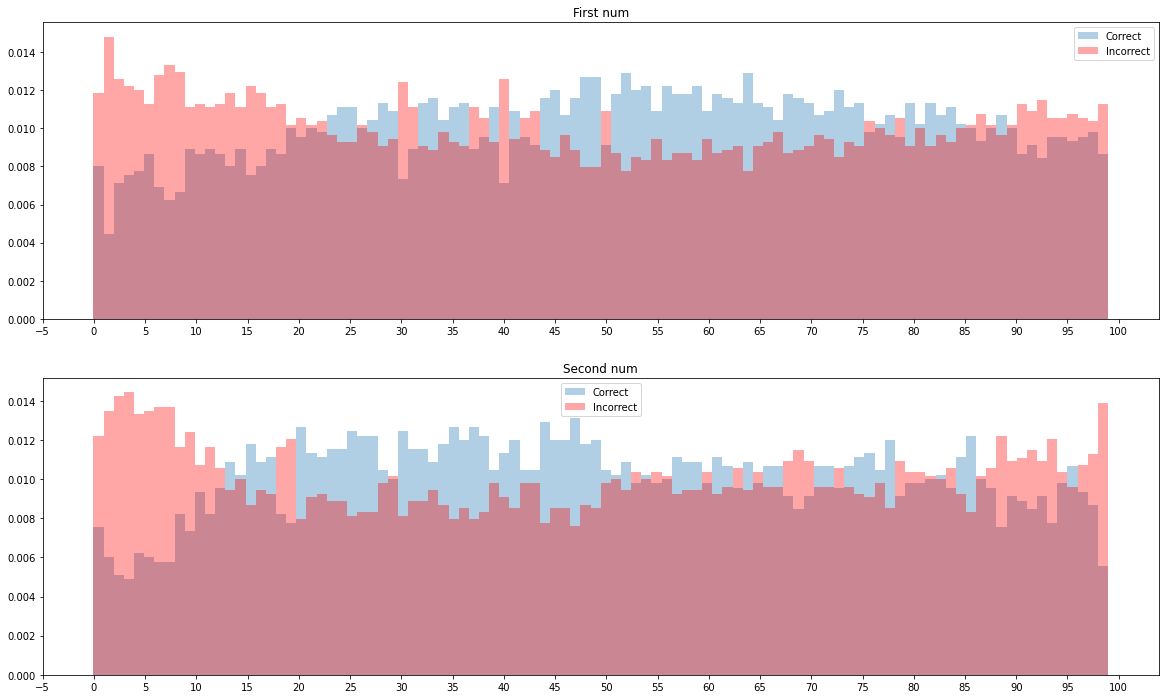

In [400]:
summarize(correct16_df, incorrect16_df, symmetric_correct16_df, symmetric_incorrect16_df)

### 32 hidden units

In [3]:
correct32_df, incorrect32_df = load_preds(32)

<ipython-input-2-cc6280e1e1ed>:10: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  correct_df['X_true_1'], correct_df['X_true_2'] = correct_df['X_true'].str.split('+', 1).str
<ipython-input-2-cc6280e1e1ed>:11: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  incorrect_df['X_true_1'], incorrect_df['X_true_2'] = incorrect_df['X_true'].str.split('+', 1).str


In [4]:
symmetric_correct32_df = symmetric_df(correct32_df)
symmetric_incorrect32_df = symmetric_df(incorrect32_df)

Correct: 55.38%
Incorrect: 44.62%
--------------------
Percent symmetric in correct: 130.61%
Percent symmetric in incorrect: 113.91%


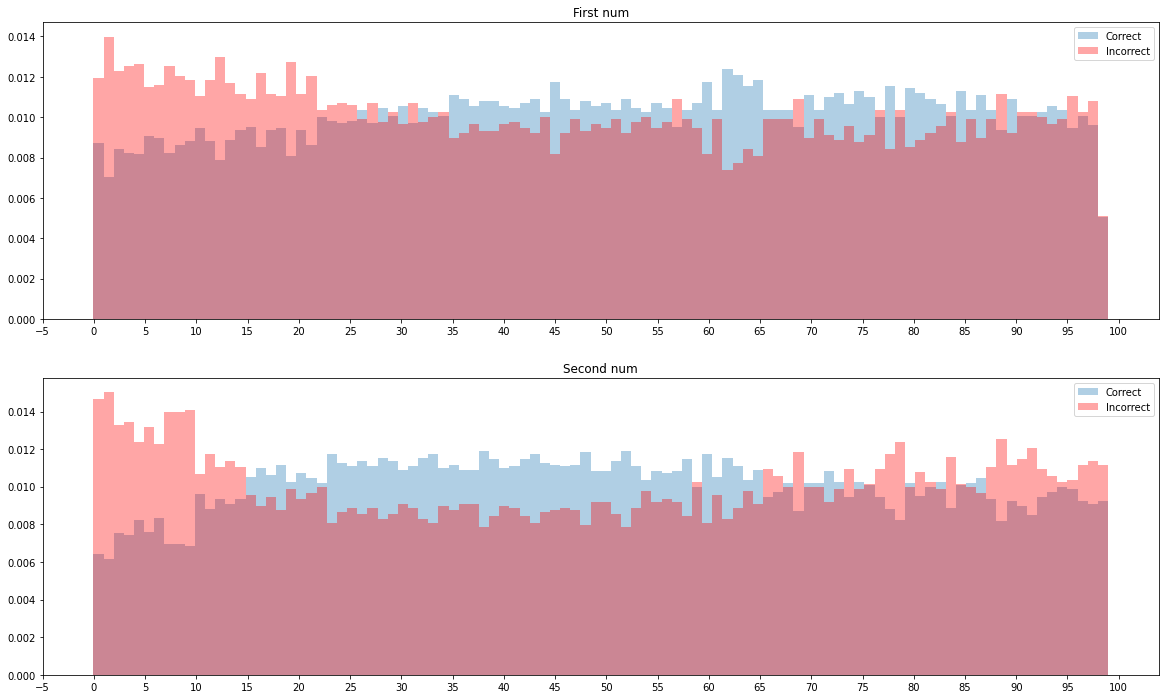

In [5]:
summarize(correct32_df, incorrect32_df, symmetric_correct32_df, symmetric_incorrect32_df)

### 64 hidden units

In [404]:
correct64_df, incorrect64_df = load_preds(64)

<ipython-input-301-cc6280e1e1ed>:10: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  correct_df['X_true_1'], correct_df['X_true_2'] = correct_df['X_true'].str.split('+', 1).str
<ipython-input-301-cc6280e1e1ed>:11: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  incorrect_df['X_true_1'], incorrect_df['X_true_2'] = incorrect_df['X_true'].str.split('+', 1).str


In [112]:
symmetric_correct64_df = symmetric_df(correct64_df)
symmetric_incorrect64_df = symmetric_df(incorrect64_df)

Correct: 72.22%
Incorrect: 27.78%
--------------------
Percent symmetric in correct: 87.68%
Percent symmetric in incorrect: 67.96%


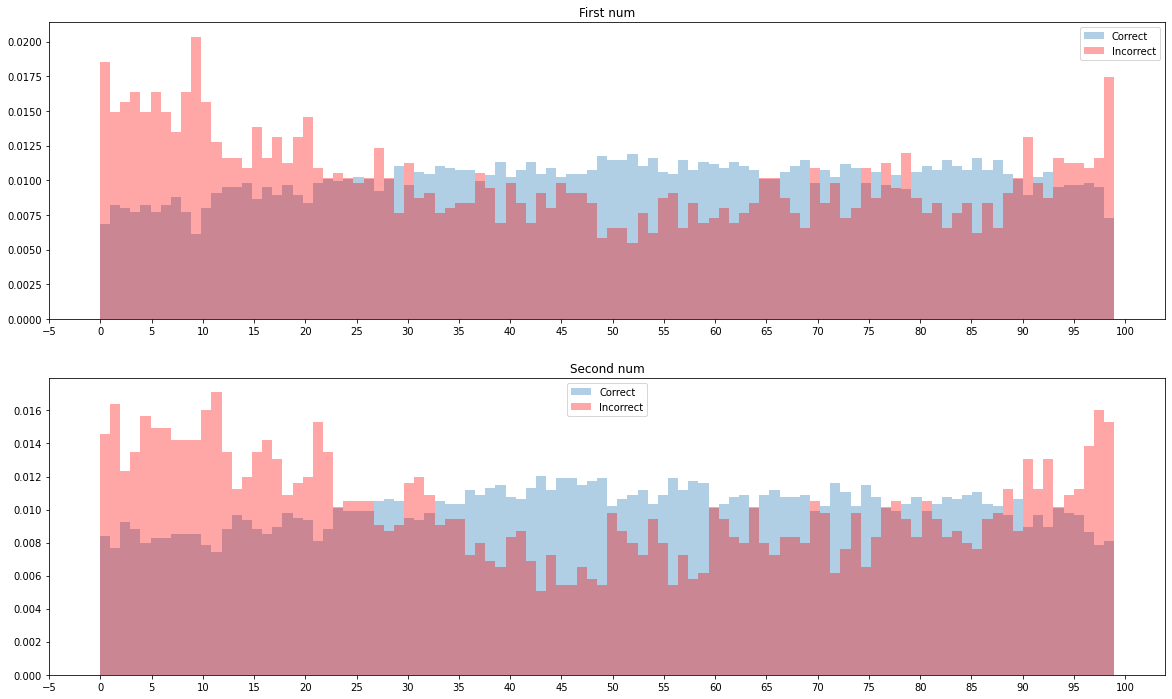

In [221]:
summarize(correct64_df, incorrect64_df, symmetric_correct64_df, symmetric_incorrect64_df)

## Finding newly learned examples

The code below is to find, as we increase the number of encoder units, what examples are newly classified correctly (meaning they were incorrect for the smaller model, and correct for the larger model). Similarly, what examples were correctly classified before, but incorrectly classified with the larger model.

### Helper functions

In [6]:
def new_changes_df(small_correct_df, small_incorrect_df, large_correct_df, large_incorrect_df):
    new_correct_df = pd.merge(large_correct_df, small_incorrect_df, on='X_true')
    new_correct_df = new_correct_df[['X_true', 'X_true_1_x', 'X_true_2_x', 'y_pred', 'y_true_y']]
    new_correct_df.columns = ['X_true', 'X_true_1', 'X_true_2', 'old_y_pred', 'y_true']
    print(f'Newly learned examples: {new_correct_df.shape[0]} ({100*new_correct_df.shape[0] / large_correct_df.shape[0]:.2f}% of all correct in larger model)')
    new_correct_mean_change = np.mean(np.abs(new_correct_df['old_y_pred'] - new_correct_df['y_true']))
    print(f'Mean delta: {new_correct_mean_change:.3f}')
    
    print('-'*20)
    new_incorrect_df = pd.merge(large_incorrect_df, small_correct_df, on='X_true')
    new_incorrect_df = new_incorrect_df[['X_true', 'X_true_1_x', 'X_true_2_x', 'y_pred', 'y_true_x']]
    new_incorrect_df.columns = ['X_true', 'X_true_1', 'X_true_2', 'new_y_pred', 'y_true']
    print(f'Newly incorrect examples: {new_incorrect_df.shape[0]} ({100*new_incorrect_df.shape[0] / large_incorrect_df.shape[0]:.2f}% of all incorrect in larger model)')
    new_incorrect_mean_change = np.mean(np.abs(new_incorrect_df['new_y_pred'] - new_incorrect_df['y_true']))
    print(f'Mean delta: {new_incorrect_mean_change:.3f}')
    
#     fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 12))
#     ax.hist(new_correct_df['old_y_pred'] - new_correct_df['y_true'], density=True, alpha=0.35, label='Newly correct')
#     ax.hist(new_incorrect_df['new_y_pred'] - new_incorrect_df['y_true'], density=True, alpha=0.35, color='red', label='Newly incorrect')
#     ax.legend();

    return new_correct_df, new_incorrect_df

### 4 to 8 units

In [392]:
new8_correct_df, new8_incorrect_df = new_changes_df(correct4_df, incorrect4_df, correct8_df, incorrect8_df)

Newly learned examples: 2251 (81.15% of all correct in larger model)
Mean delta: 2.702
--------------------
Newly incorrect examples: 1076 (14.89% of all incorrect in larger model)
Mean delta: 1.637


Correct: 67.66%
Incorrect: 32.34%
--------------------


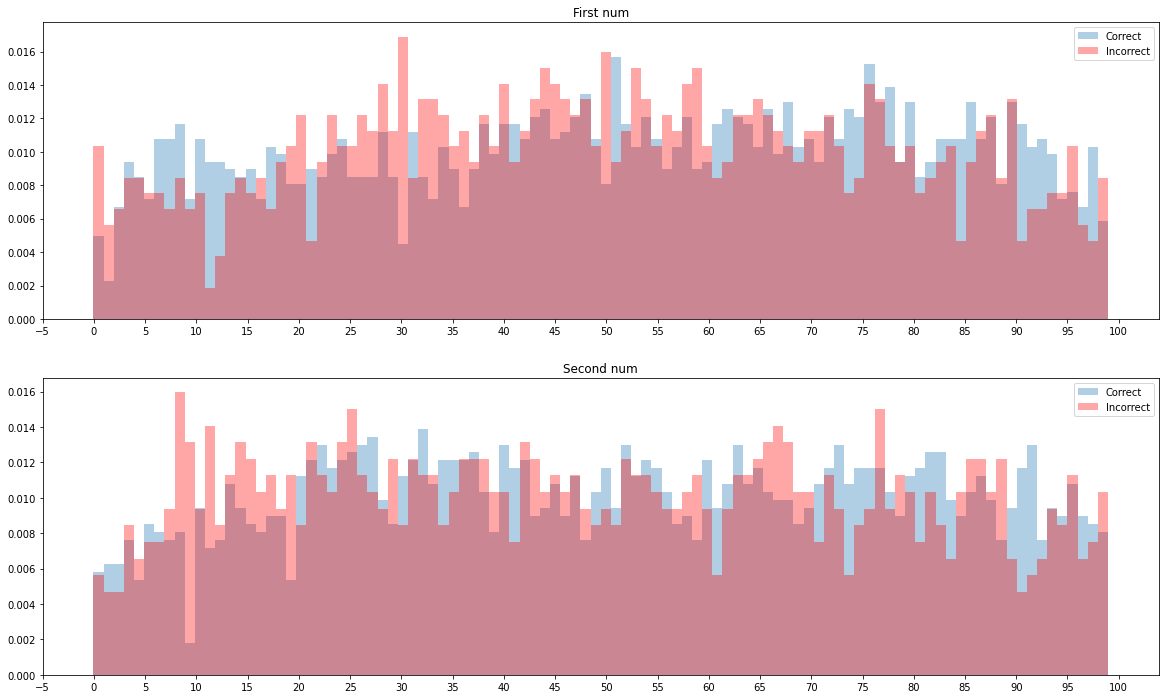

In [393]:
summarize(new8_correct_df, new8_incorrect_df)

### 8 to 16 units

In [235]:
new16_correct_df, new16_incorrect_df = new_changes_df(correct8_df, incorrect8_df, correct16_df, incorrect16_df)

Newly learned examples: 3207 (70.61% of all correct in larger model)
Mean delta: 1.899
--------------------
Newly incorrect examples: 1439 (26.36% of all incorrect in larger model)
Mean delta: 1.197


Correct: 69.03%
Incorrect: 30.97%
--------------------


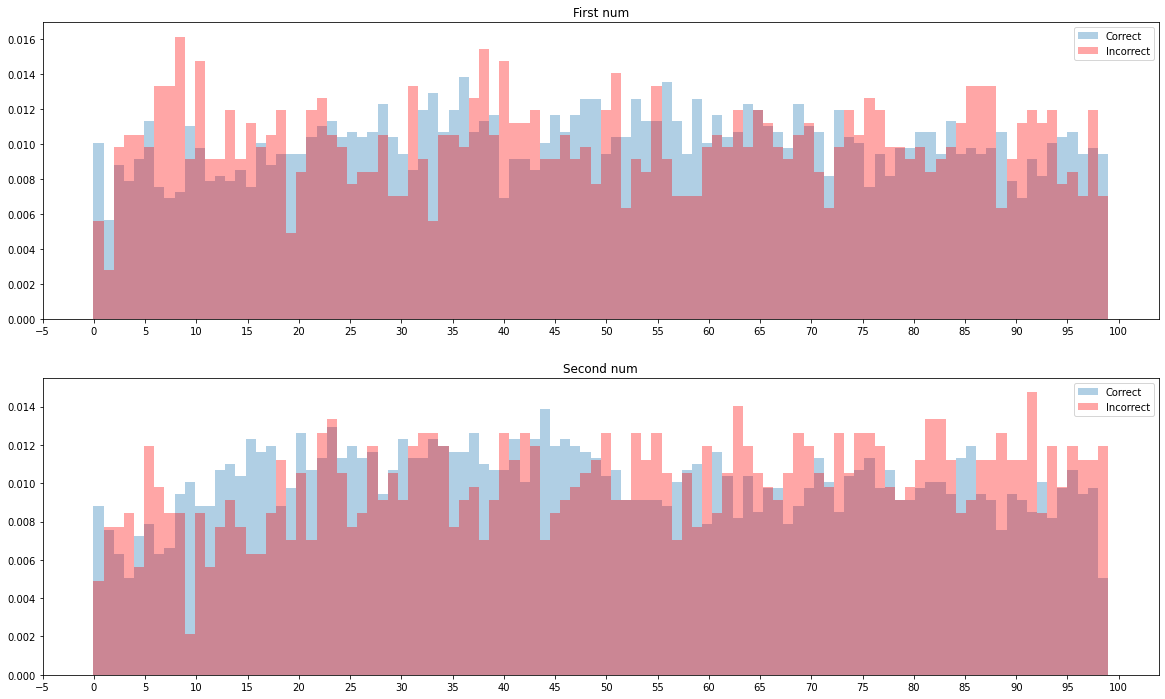

In [227]:
summarize(new16_correct_df, new16_incorrect_df)

### 16 to 32 units

In [236]:
new32_correct_df, new32_incorrect_df = new_changes_df(correct16_df, incorrect16_df, correct32_df, incorrect32_df)

Newly learned examples: 3406 (51.90% of all correct in larger model)
Mean delta: 1.209
--------------------
Newly incorrect examples: 1385 (40.30% of all incorrect in larger model)
Mean delta: 1.056


Correct: 71.09%
Incorrect: 28.91%
--------------------


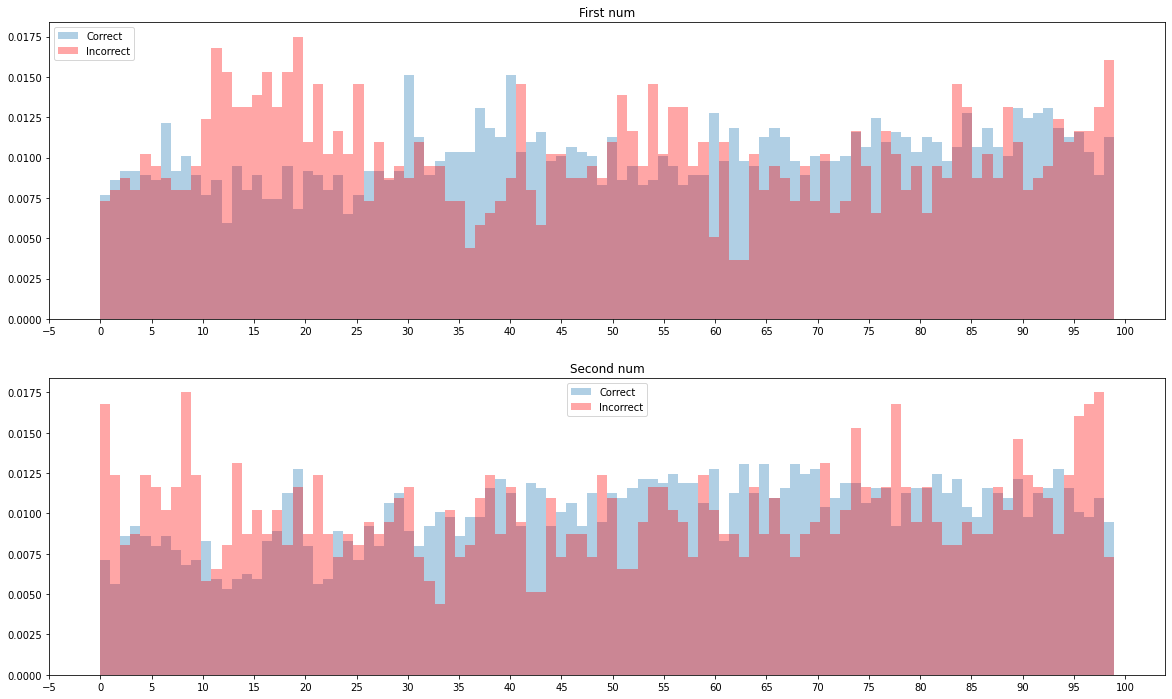

In [229]:
summarize(new32_correct_df, new32_incorrect_df)

### 32 to 64 units

In [237]:
new64_correct_df, new64_incorrect_df = new_changes_df(correct32_df, incorrect32_df, correct64_df, incorrect64_df)

Newly learned examples: 2097 (29.04% of all correct in larger model)
Mean delta: 1.087
--------------------
Newly incorrect examples: 1438 (51.76% of all incorrect in larger model)
Mean delta: 1.048


summarize(new64_correct_df, new64_incorrect_df)

## Heat map

Heat maps showing how far off the prediction is from correct for each pair of numbers.

In [13]:
def heatmap(correct_df, incorrect_df, binary=False, save=False, units=None, three_d=False):
    correct_labeled_df = correct_df.copy()
    correct_labeled_df['delta'] = 0

    incorrect_labeled_df = incorrect_df.copy()
    if binary:
        incorrect_labeled_df['delta'] = 1
    else:
        incorrect_labeled_df['delta'] = incorrect_labeled_df['y_pred'] - incorrect_labeled_df['y_true']

    all_df = pd.concat([correct_labeled_df[['X_true_1', 'X_true_2', 'delta']], incorrect_labeled_df[['X_true_1', 'X_true_2', 'delta']]])
    
    all_pivot = pd.pivot_table(data=all_df, index='X_true_1', columns='X_true_2', values='delta')
    
    fig = plt.figure(figsize=(20,14))
    if three_d:
        ax = fig.gca(projection='3d')
        ax.plot_trisurf(all_df['X_true_1'], all_df['X_true_2'], all_df['delta'])
    elif binary:
        sns.heatmap(all_pivot, cmap='Greys')
        if save and units:
            plt.savefig(f'heatmap_{units}_binary.png', dpi=400)
    else:
        sns.heatmap(all_pivot, robust=True, cmap='coolwarm', center=0)
        if save and units:
            plt.savefig(f'heatmap_{units}.png', dpi=400)
    

### 4 units

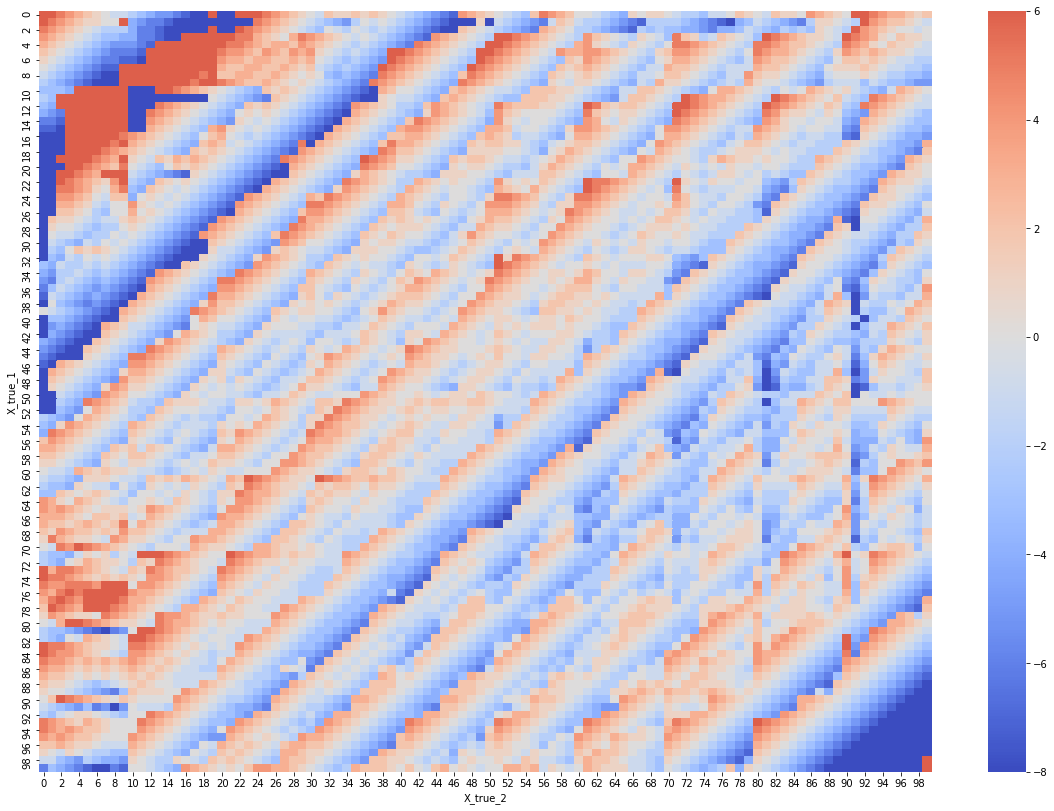

In [395]:
heatmap(correct4_df, incorrect4_df)

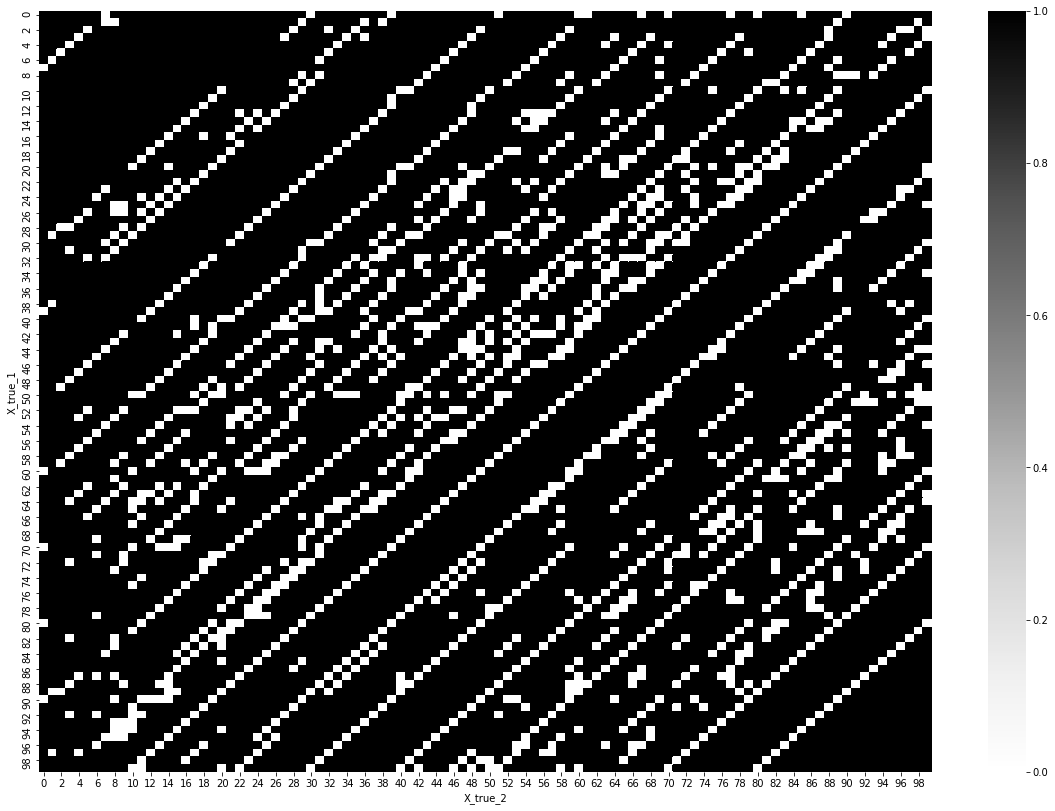

In [386]:
heatmap(correct4_df, incorrect4_df, binary=True)

### 8 units

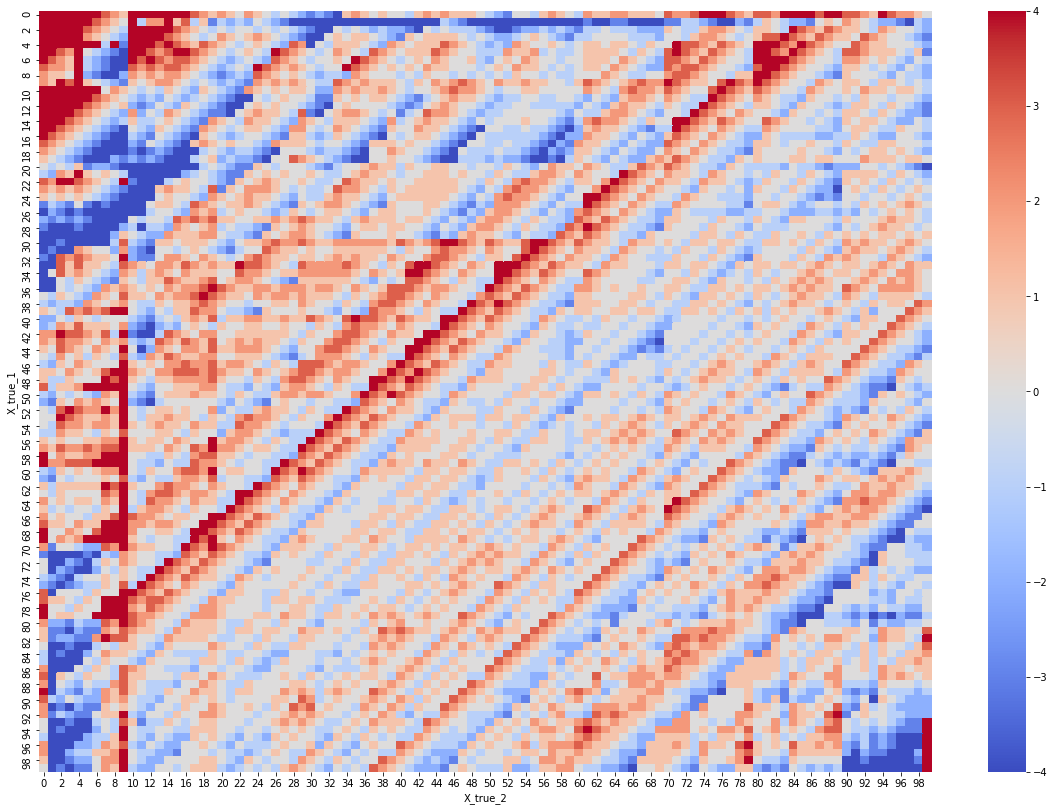

In [396]:
heatmap(correct8_df, incorrect8_df)

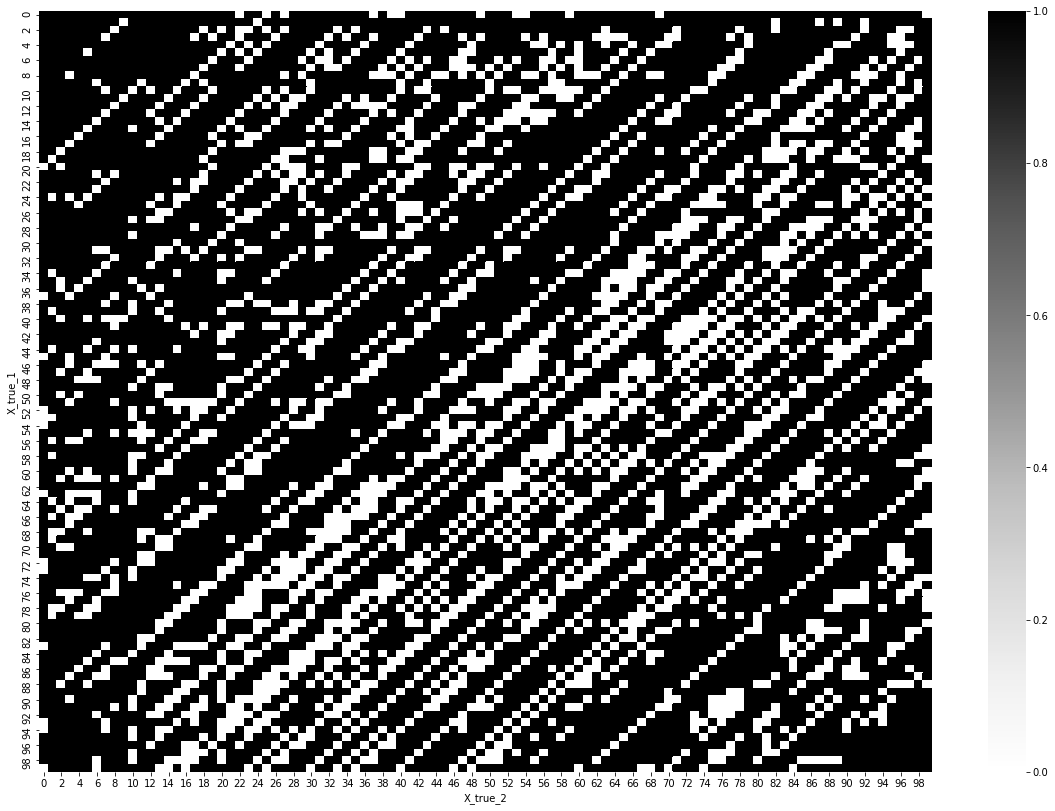

In [308]:
heatmap(correct8_df, incorrect8_df, binary=True)

### 16 units

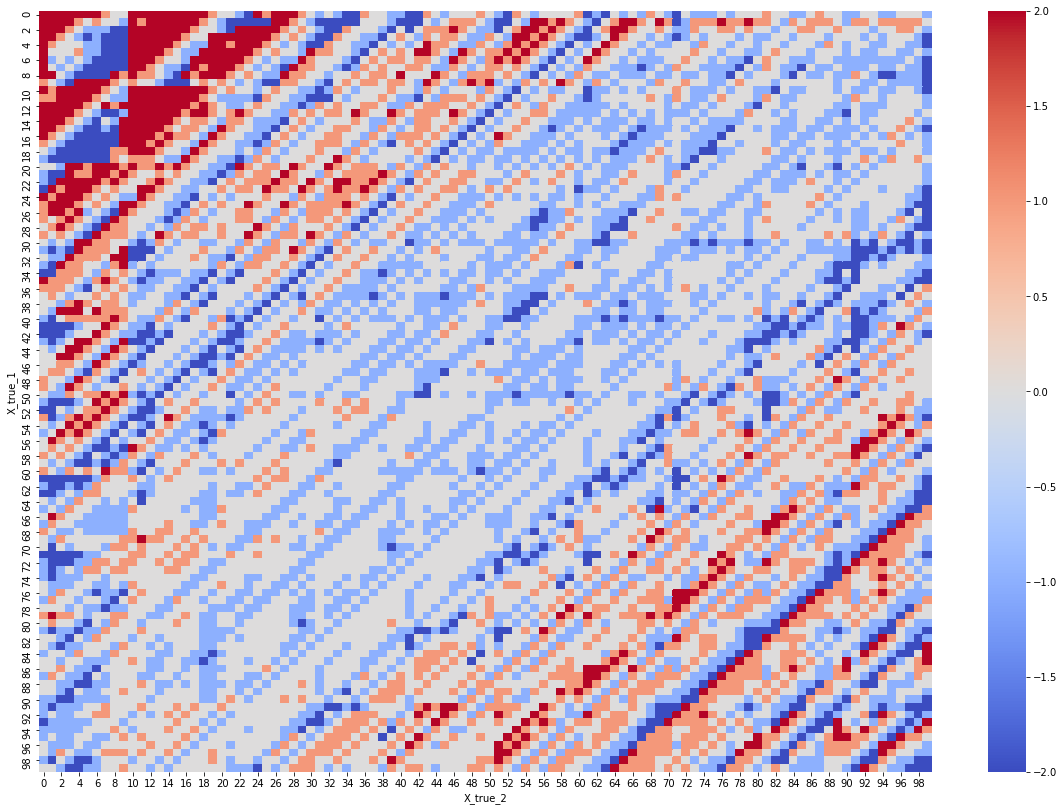

In [401]:
heatmap(correct16_df, incorrect16_df)

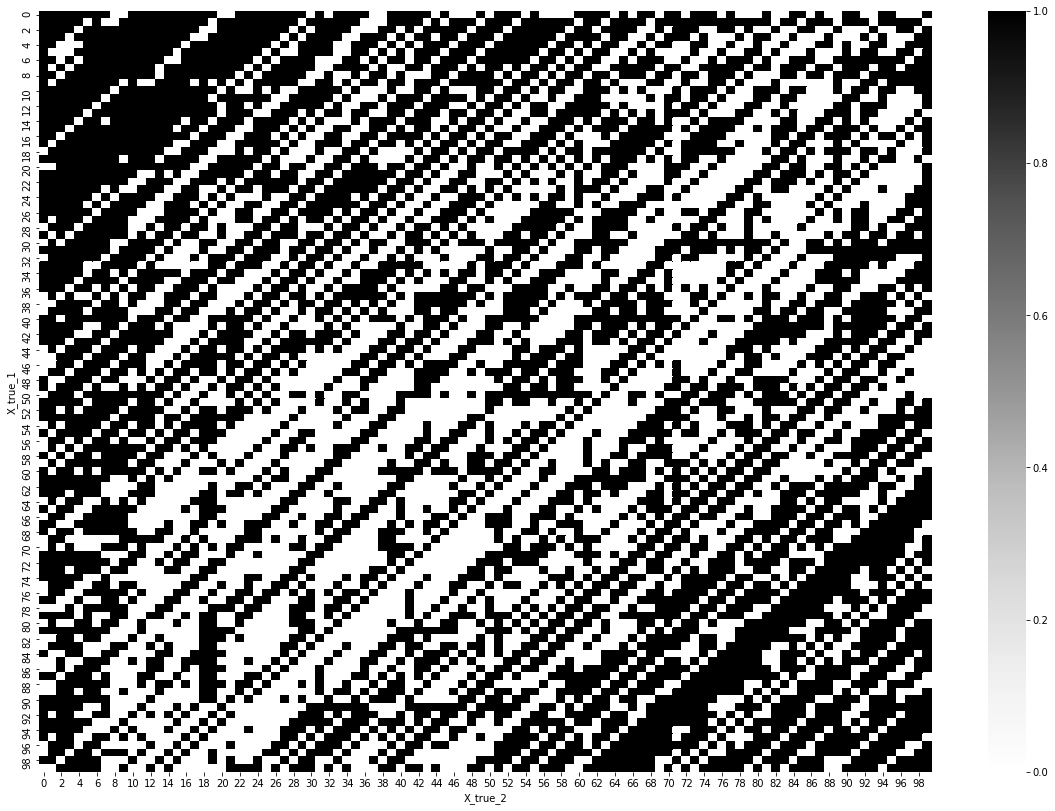

In [289]:
heatmap(correct16_df, incorrect16_df, binary=True)

### 32 units

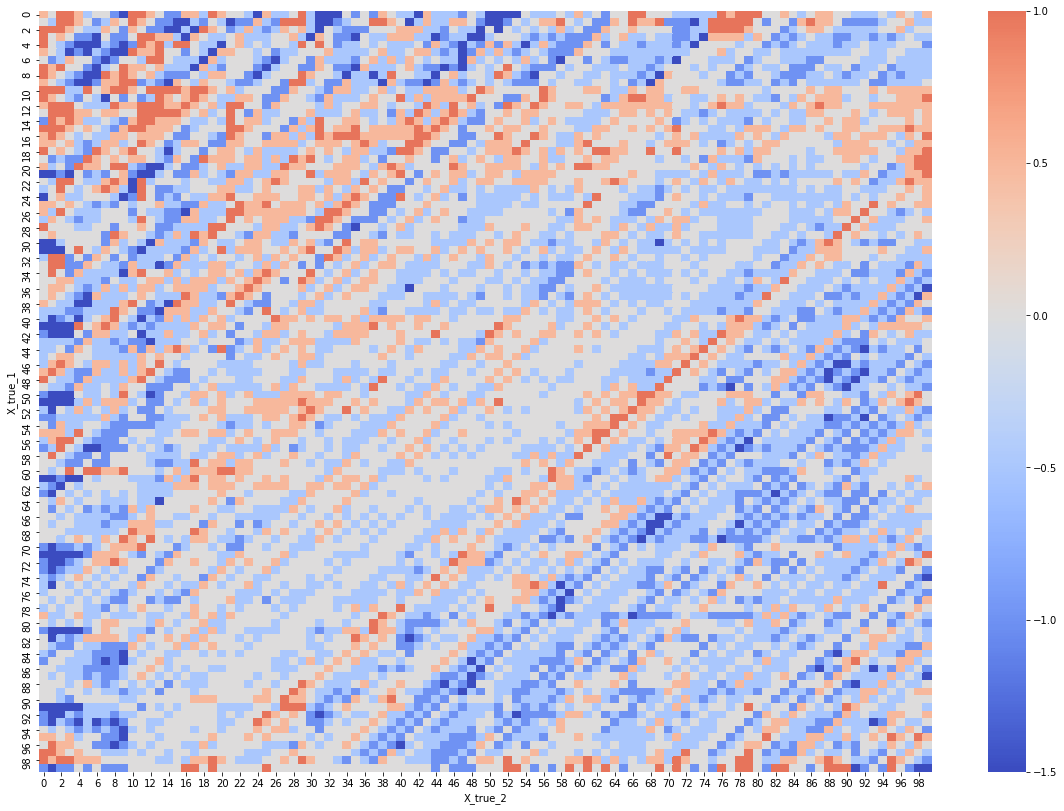

In [8]:
heatmap(correct32_df, incorrect32_df)

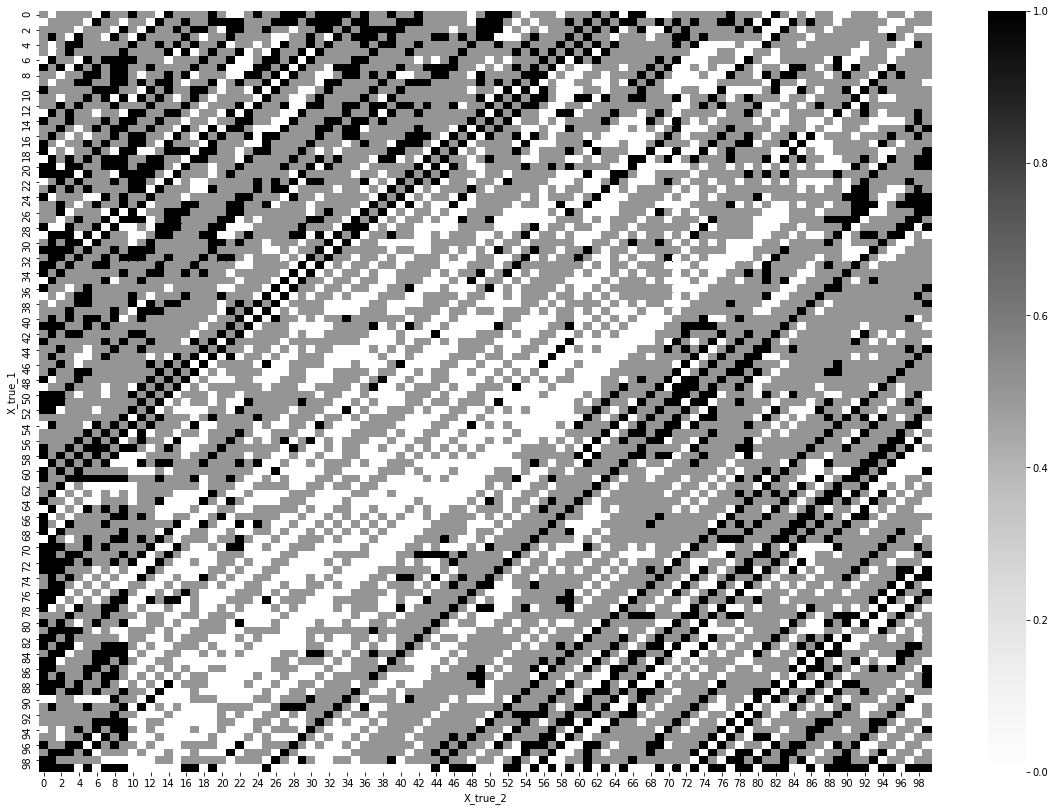

In [14]:
heatmap(correct32_df, incorrect32_df, binary=True)

### 64 units

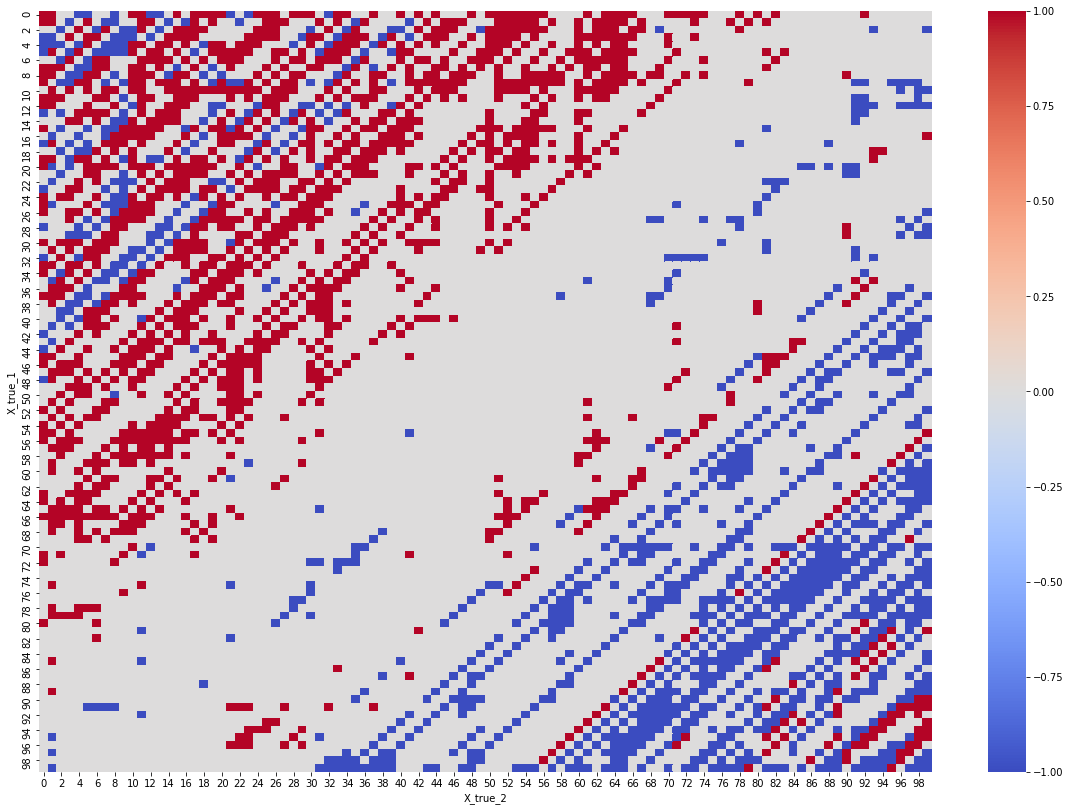

In [406]:
heatmap(correct64_df, incorrect64_df)

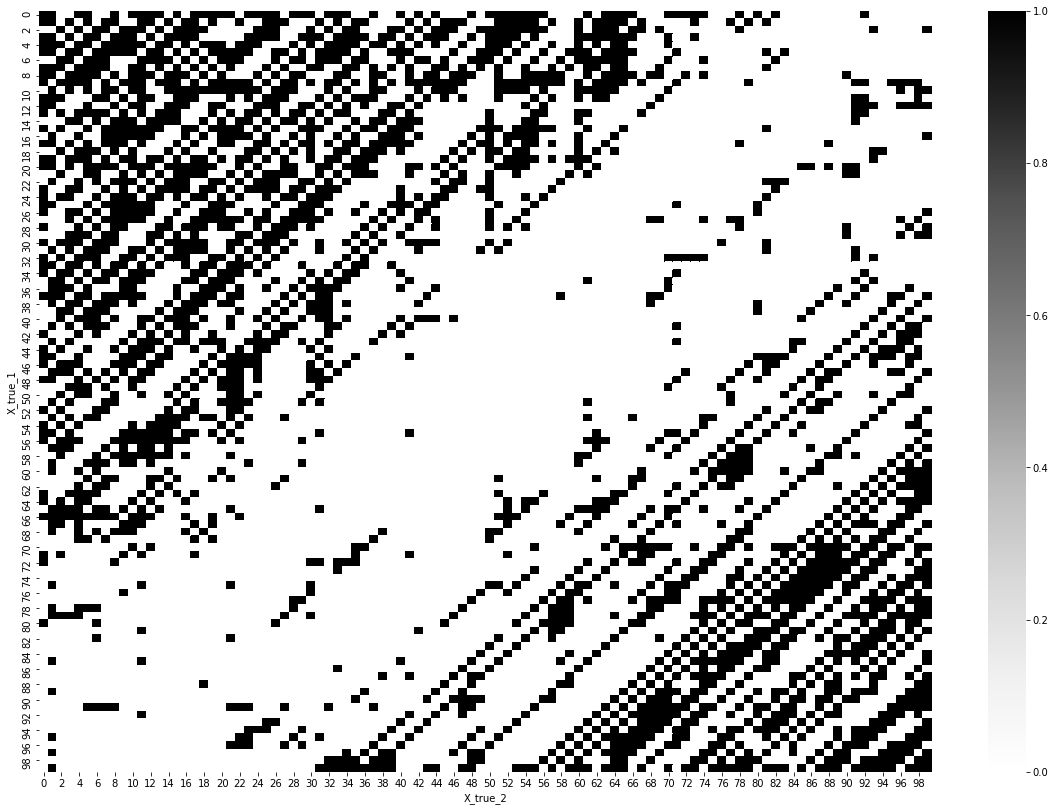

In [295]:
heatmap(correct64_df, incorrect64_df, binary=True)

## Diagonals

Based on these heatmaps, it looks like the models "learn along the diagonals." That is, they learn what patterns add up to a single number, and then slowly expand the number of sums. So at each step, what sums are being learned?

In [428]:
def plot_sums(correct_df):
    sums = range(198)
    pct_correct = np.zeros(198)
    for x in sums:
        num_correct = correct_df[correct_df['y_true'] == x].shape[0]
        pct_correct[x] = num_correct / (x+1)
        
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 12))
    ax.bar(x=sums, height=pct_correct)
    plt.title('Percentage of terms which correctly sum to x')
    plt.xlabel('x')
    plt.ylabel('Percentage of summands (a, b) which correctly sum to x')
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(0, 198, 5))
    
    print('Sums being correct over 50% of the time:')
    print(sorted(list(np.where(pct_correct > 0.5)[0])))

### 4 units

Sums being correct over 50% of the time:
[7, 30, 37, 39, 51, 61, 67, 71, 91, 101, 102, 109, 119]


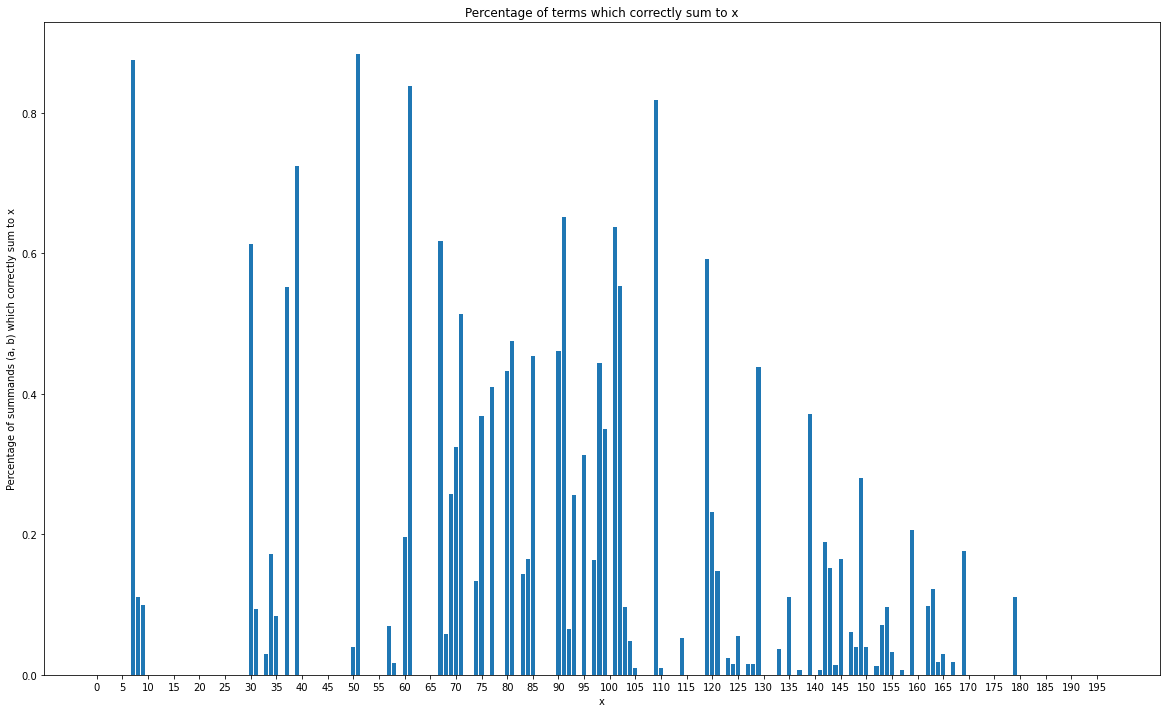

In [429]:
plot_sums(correct4_df)

### 8 units

Sums being correct over 50% of the time:
[20, 25, 29, 37, 40, 45, 49, 70, 73, 80, 83, 93, 94, 98, 99, 101, 105, 108, 113, 115, 118, 125, 129]


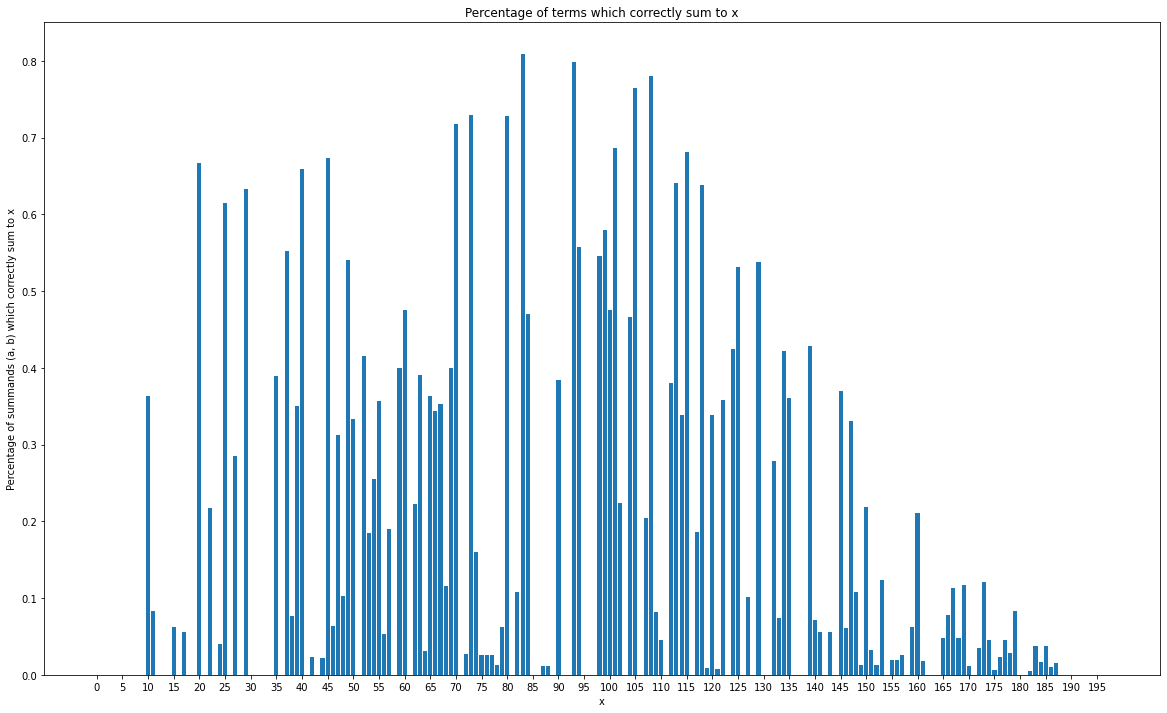

In [430]:
plot_sums(correct8_df)

### 16 units

Sums being correct over 50% of the time:
[6, 8, 18, 30, 32, 37, 38, 39, 44, 46, 47, 50, 54, 59, 61, 64, 66, 67, 69, 70, 72, 74, 76, 78, 79, 80, 83, 86, 88, 89, 90, 93, 94, 96, 97, 99, 100, 103, 105, 107, 109, 112, 114, 115, 116, 118, 120]


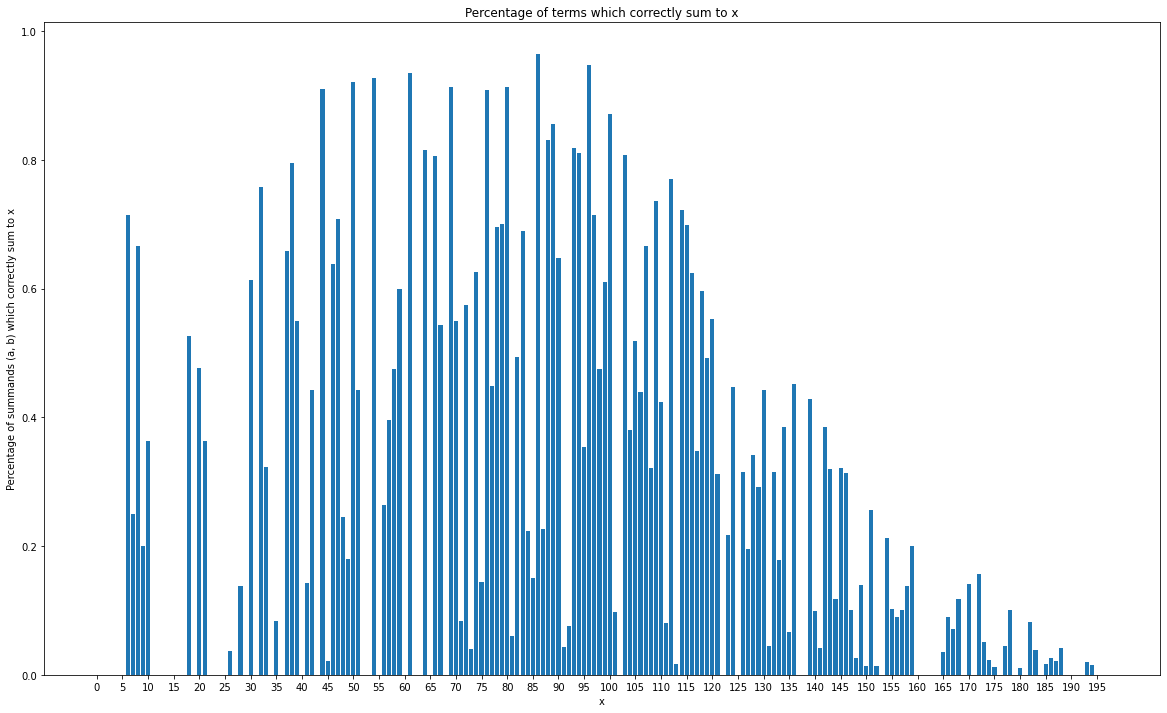

In [431]:
plot_sums(correct16_df)

### 32 units

Sums being correct over 50% of the time:
[1, 6, 10, 22, 29, 30, 32, 35, 37, 39, 40, 44, 46, 49, 51, 53, 55, 57, 59, 60, 63, 65, 66, 67, 69, 70, 71, 72, 73, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 116, 117, 119, 122, 123, 126, 129]


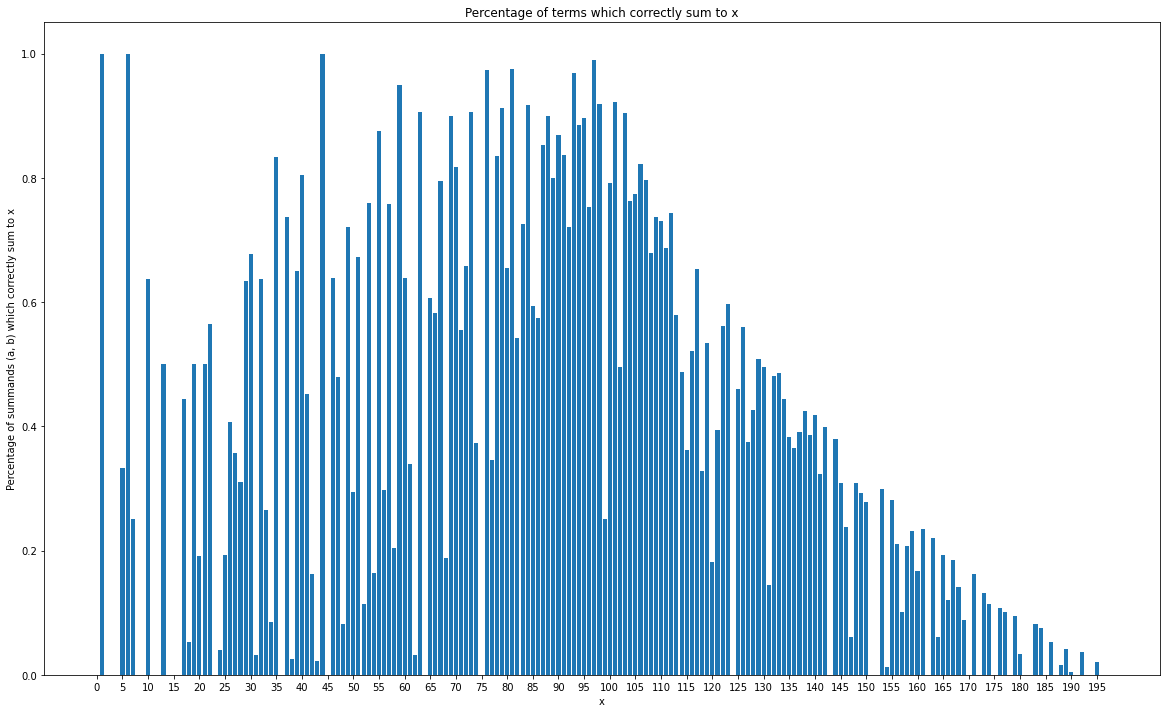

In [432]:
plot_sums(correct32_df)

### 64 units

Sums being correct over 50% of the time:
[2, 3, 7, 10, 14, 16, 19, 21, 25, 29, 30, 31, 33, 35, 40, 43, 45, 47, 49, 50, 53, 57, 59, 60, 61, 62, 63, 65, 67, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 126, 129, 130]


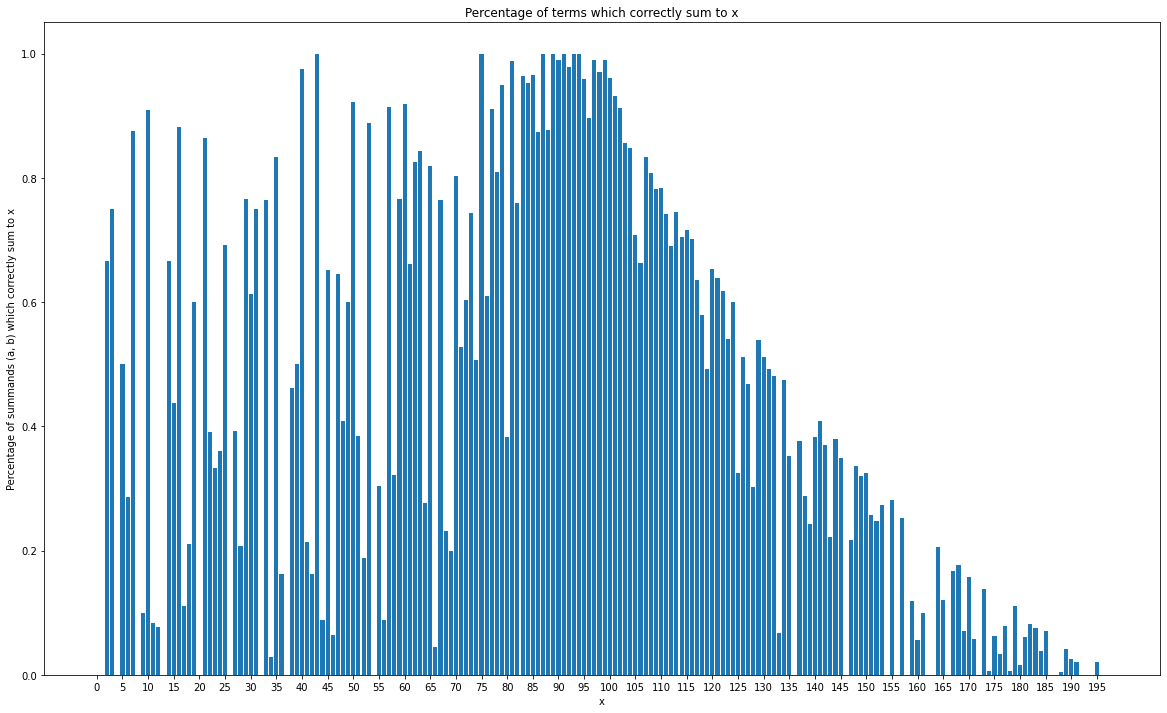

In [433]:
plot_sums(correct64_df)